<a href="https://colab.research.google.com/github/PhamQuocHuy1101/acea-water-prediction/blob/master/DoAnCuoiKi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import print_function
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
import os
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('./drive/MyDrive/cacMoHinhPhanTichDuLieu')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv('./Aquifer_Petrignano.csv') # Good 8
# df = pd.read_csv('./data/Lake_Bilancino.csv') # Good 9
# df = pd.read_csv('./River_Arno.csv') # Good 17
# df = pd.read_csv('./Water_Spring_Amiata.csv') # Good 14
# df.head()

In [5]:
# convert string to datetime
def to_date(df):
    df.Date = pd.to_datetime(df.Date, format='%d/%m/%Y')

In [ ]:
df = pd.read_csv('./data/Aquifer_Petrignano.csv') # Good 8
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


# Missing value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [ ]:
# Check date missing
to_date(df)
delta = df.Date - df.Date.shift(1)
delta.sum(), delta.count() # duration 1 days in all data

(Timedelta('5222 days 00:00:00'), 5222)

In [ ]:
def plot_null_value(df, columns, date='Date'):
    fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 5 * len(columns)))
    if len(columns) == 1:
        axs = [axs]
    for ax, col in zip(axs, columns):
        null_value = df[col].fillna(0)
        replace = df[col].fillna(np.inf)

        sns.lineplot(x=df[date], y=null_value, ax=ax, color='darkorange', label='miss value')
        sns.lineplot(x=df[date], y=replace, ax=ax, color='dodgerblue', label='fill value')

        ax.set_xlim([df[date].min(), df[date].max()])

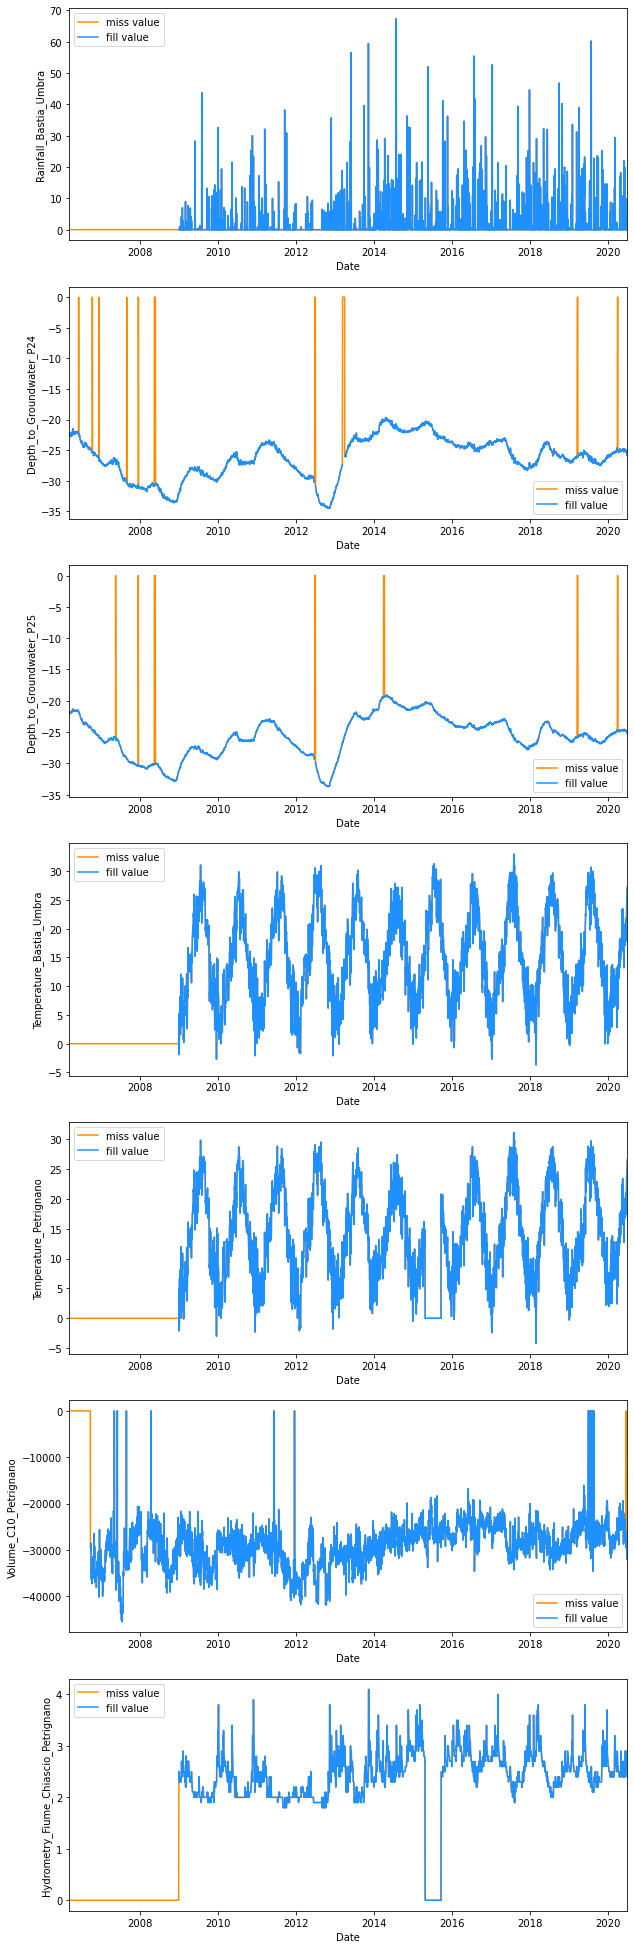

In [ ]:
plot_null_value(df, df.columns[1:])

In [ ]:
# start point has null value
start_miss = (df.Date[df.Rainfall_Bastia_Umbra.isnull()].max(), 
                df.Date[df.Temperature_Bastia_Umbra.isnull()].max(), 
                df.Date[df.Temperature_Petrignano.isnull()].max(), 
                df.Date[df.Hydrometry_Fiume_Chiascio_Petrignano.isnull()].max(),
                df.Date[df.Volume_C10_Petrignano.isnull()].max())
start_miss

(Timestamp('2008-12-31 00:00:00'),
 Timestamp('2008-12-31 00:00:00'),
 Timestamp('2008-12-31 00:00:00'),
 Timestamp('2008-12-31 00:00:00'),
 Timestamp('2020-06-15 00:00:00'))

In [ ]:
# Remove value from 31/12/2008
import datetime
df = df[df.Date > datetime.datetime(2008, 12, 31)]
df.index = np.arange(len(df))
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2009-01-01,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
1,2009-01-02,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2,2009-01-03,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
3,2009-01-04,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4199 entries, 0 to 4198
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  4199 non-null   datetime64[ns]
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64       
 2   Depth_to_Groundwater_P24              4160 non-null   float64       
 3   Depth_to_Groundwater_P25              4172 non-null   float64       
 4   Temperature_Bastia_Umbra              4199 non-null   float64       
 5   Temperature_Petrignano                4199 non-null   float64       
 6   Volume_C10_Petrignano                 4198 non-null   float64       
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 295.2 KB


In [ ]:
df.Volume_C10_Petrignano.interpolate(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4199 entries, 0 to 4198
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  4199 non-null   datetime64[ns]
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64       
 2   Depth_to_Groundwater_P24              4160 non-null   float64       
 3   Depth_to_Groundwater_P25              4172 non-null   float64       
 4   Temperature_Bastia_Umbra              4199 non-null   float64       
 5   Temperature_Petrignano                4199 non-null   float64       
 6   Volume_C10_Petrignano                 4199 non-null   float64       
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 295.2 KB


Mean / std difference:  0.5491568296795947 0.2470917340525159


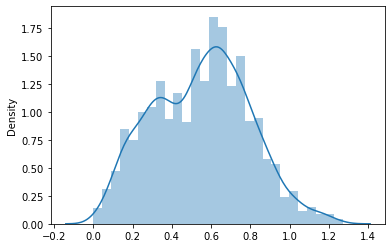

In [ ]:
drop_df = df.dropna()
delta = np.abs(drop_df.Depth_to_Groundwater_P24 - drop_df.Depth_to_Groundwater_P25)
print('Mean / std difference: ', delta.mean(), delta.std())
sns.distplot(delta)
plt.show()

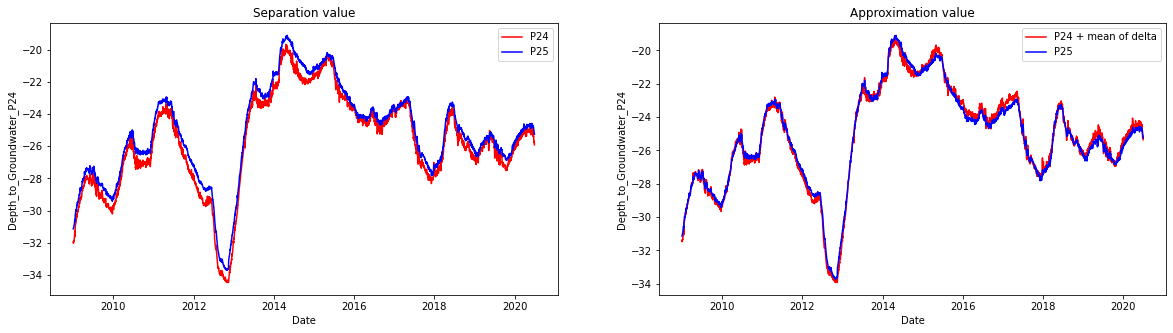

Range value: from -19.1 to -33.71
Mean absolute error:  0.2042956877048254


In [ ]:
fg, axs = plt.subplots(nrows=1, ncols= 2, figsize=(10*2, 5))

axs[0].set_title('Separation value')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P24, color='red', label='P24', ax = axs[0])
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P25, color='blue', label='P25', ax = axs[0])

axs[1].set_title('Approximation value')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P24 + delta.mean(), color='red', label='P24 + mean of delta', ax = axs[1])
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_P25, color='blue', label='P25', ax = axs[1])
plt.show()

print("Range value: from {0} to {1}".format(df.Depth_to_Groundwater_P25.max(), df.Depth_to_Groundwater_P25.min()))
print("Mean absolute error: ", np.abs((df.Depth_to_Groundwater_P24 + delta.mean()) - df.Depth_to_Groundwater_P25).mean())

In [ ]:
np.save('./checkpoint/delta.npy', delta)

def load_delta_func(path):
    delta = np.load('./checkpoint/deta.py')
    def convert_p24_to_p25(p24_value):
        return p24_value + delta.mean()
    return convert_p24_to_p25

In [ ]:
p24_fill = df.Depth_to_Groundwater_P24.copy()
p24_null_index = df.Depth_to_Groundwater_P24[df.Depth_to_Groundwater_P24.isnull()].index
p24_fill[p24_null_index] = df.Depth_to_Groundwater_P25[p24_null_index] - delta.mean()

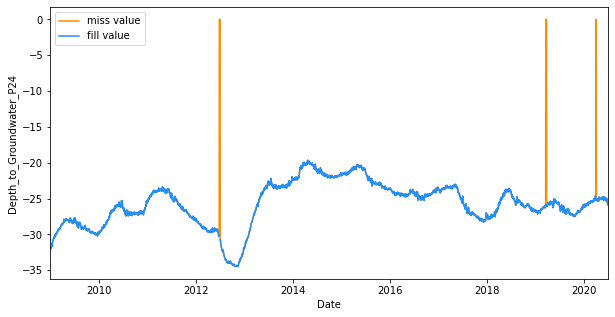

In [ ]:
df.Depth_to_Groundwater_P24 = p24_fill

plot_null_value(df, ['Depth_to_Groundwater_P24'])

Còn 3 khoảng bị missing data:
- 2012 - 2013
- 2019 - 2020
- 2020 - hết

In [ ]:
count = df.Depth_to_Groundwater_P24.isnull().value_counts()
print(count.to_string())
print('======')
print((count/count.sum()).to_string())

False    4181
True       18
False    0.995713
True     0.004287


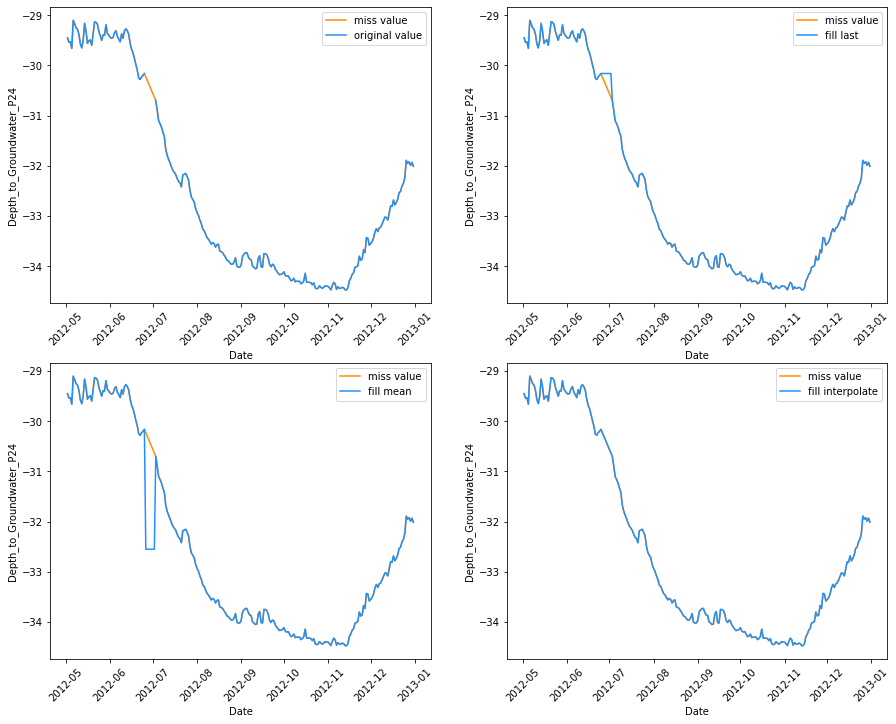

In [ ]:
def get_fill_value(origin_col):
    last_value = origin_col.ffill()
    mean_value = origin_col.fillna(origin_col.mean())
    interpolate = origin_col.interpolate()
    return last_value, mean_value, interpolate

def fill_score(original_data, r):
    data = original_data.copy()
    miss_data = data.sample(int(r * len(data)))
    data[miss_data.index] = np.nan
    
    last_value, mean_value, interpolate = get_fill_value(data)
    last_err = np.abs(last_value - original_data).mean()
    mean_err = np.abs(mean_value - original_data).mean()
    interpolate_err = np.abs(interpolate - original_data).mean()
    
    return last_err, mean_err, interpolate_err

def fill_value_visual(date, origin_col):
    last_value, mean_value, interpolate = get_fill_value(origin_col)
    
    fg, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

    sns.lineplot(x=date, y=origin_col, color='darkorange', label='miss value', ax = axs[0][0])
    sns.lineplot(x=date, y=origin_col.fillna(np.inf), color='dodgerblue', label='original value', ax = axs[0][0])
    axs[0][0].tick_params(axis='x', rotation=45)

    sns.lineplot(x=date, y=origin_col, color='darkorange', label='miss value', ax = axs[0][1])
    sns.lineplot(x=date, y=last_value, color='dodgerblue', label='fill last', ax = axs[0][1])
    axs[0][1].tick_params(axis='x', rotation=45)
    
    sns.lineplot(x=date, y=origin_col, color='darkorange', label='miss value', ax = axs[1][0])
    sns.lineplot(x=date, y=mean_value, color='dodgerblue', label='fill mean', ax = axs[1][0])
    axs[1][0].tick_params(axis='x', rotation=45)
    
    sns.lineplot(x=date, y=origin_col, color='darkorange', label='miss value', ax = axs[1][1])
    sns.lineplot(x=date, y=interpolate, color='dodgerblue', label='fill interpolate', ax = axs[1][1])
    axs[1][1].tick_params(axis='x', rotation=45)
    
    plt.show()

index = (df.Date > '05-2012') & (df.Date < '2013')
fill_value_visual(df.Date[index], df.Depth_to_Groundwater_P24[index])

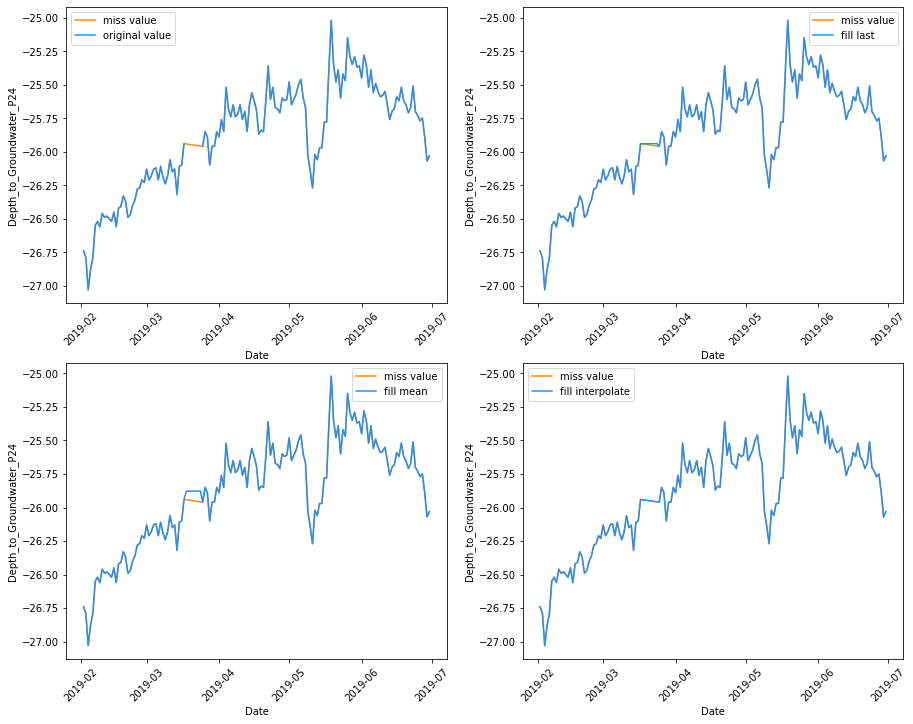

In [ ]:
index = (df.Date > '02-2019') & (df.Date < '07-2019')
fill_value_visual(df.Date[index], df.Depth_to_Groundwater_P24[index])

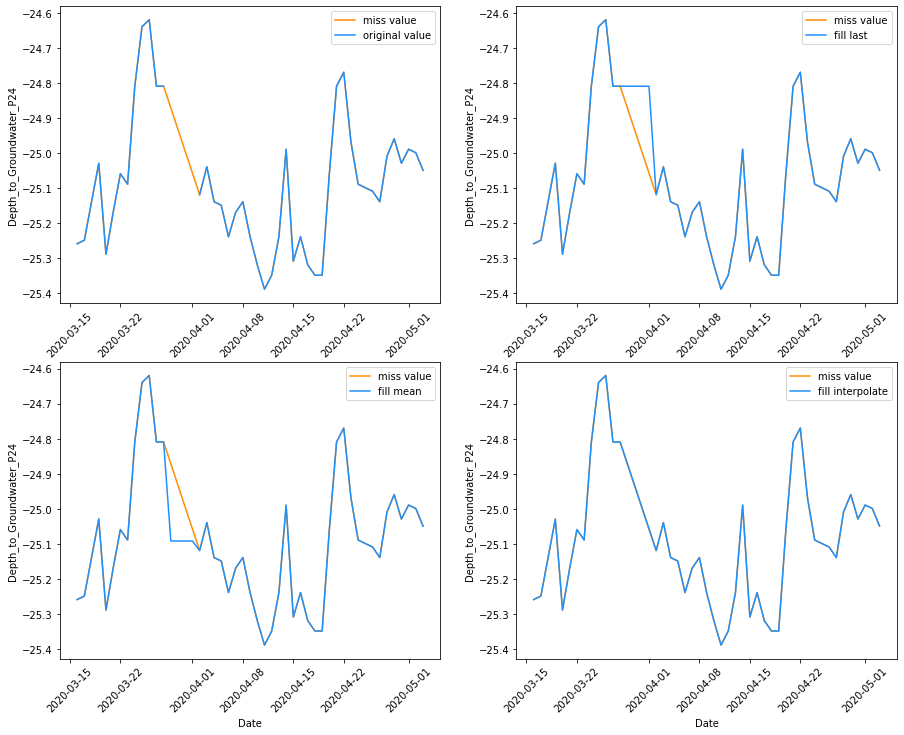

In [ ]:
index = (df.Date > '15-03-2020') & (df.Date < '05-04-2020')
fill_value_visual(df.Date[index], df.Depth_to_Groundwater_P24[index])

In [ ]:
# computer error when using different filling method
index = (df.Date > '2014') & (df.Date < '2016')

last_err, mean_err, inter_err = fill_score(df.Depth_to_Groundwater_P24[index], 0.2)
print("Last value filling: ", last_err)
print("Mean value filling: ", mean_err)
print("Interpolate value filling: ", inter_err)


Last value filling:  0.01729395604395609
Mean value filling:  0.15421362064753746
Interpolate value filling:  0.013820970695970717


In [ ]:
df.Depth_to_Groundwater_P24.interpolate(inplace=True)

## Extract feature

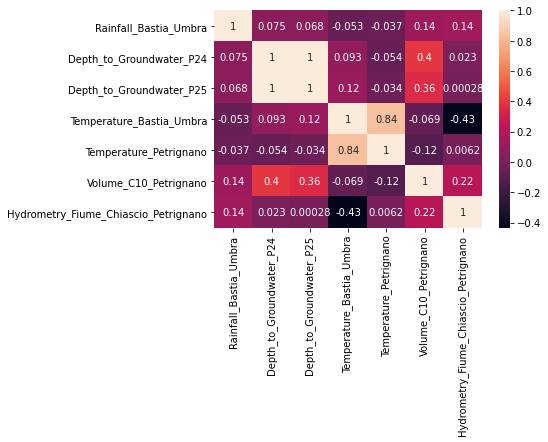

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.columns

Index(['Date', 'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

In [ ]:
df.drop(['Depth_to_Groundwater_P25', 'Temperature_Petrignano'], axis=1, inplace = True)
df.columns = ['date', 'rainfall', 'dept', 'temperature', 'volume', 'hydrometry']
df.head()

,date,rainfall,dept,temperature,volume,hydrometry
0,2009-01-01,0.0,-31.96,5.2,-24530.688,2.4
1,2009-01-02,0.0,-32.03,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.97,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.91,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.94,-1.9,-29854.656,2.3


# Outlier

## Explore outlier

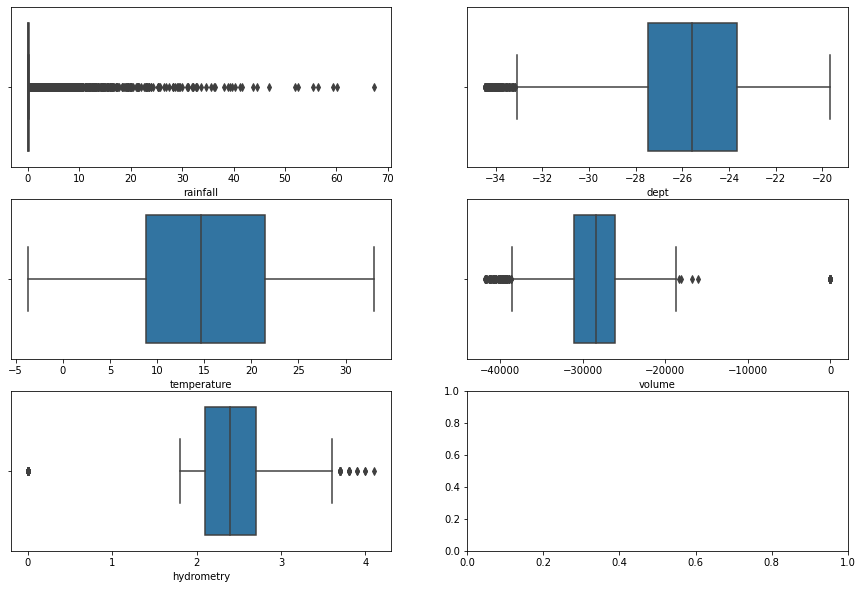

In [ ]:
_, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

sns.boxplot(df.rainfall, ax = axs[0][0])
sns.boxplot(df.dept, ax = axs[0][1])
sns.boxplot(df.temperature, ax = axs[1][0])
sns.boxplot(df.volume, ax = axs[1][1])
sns.boxplot(df.hydrometry, ax = axs[2][0])
plt.show()

In [ ]:
des = df.describe()
des

,rainfall,dept,temperature,volume,hydrometry
count,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000
mean,1.556633,-25.726428,15.030293,-28668.781432,2.372517
std,5.217923,3.032667,7.794871,4570.206679,0.589088
min,0.000000,-34.470000,-3.700000,-41890.176000,0.000000
25%,0.000000,-27.455000,8.800000,-31082.400000,2.100000
50%,0.000000,-25.590000,14.700000,-28388.448000,2.400000
75%,0.100000,-23.660000,21.400000,-26043.984000,2.700000
max,67.300000,-19.660000,33.000000,0.000000,4.100000


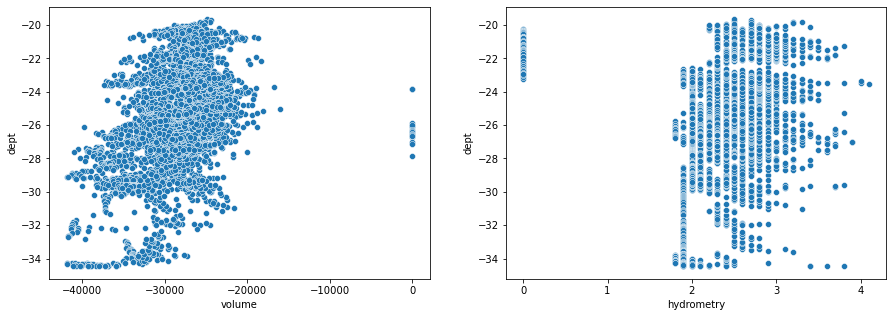

In [ ]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.scatterplot(df.volume, df.dept, ax = axs[0])
sns.scatterplot(df.hydrometry, df.dept, ax = axs[1])
plt.show()

## Deal with outlier

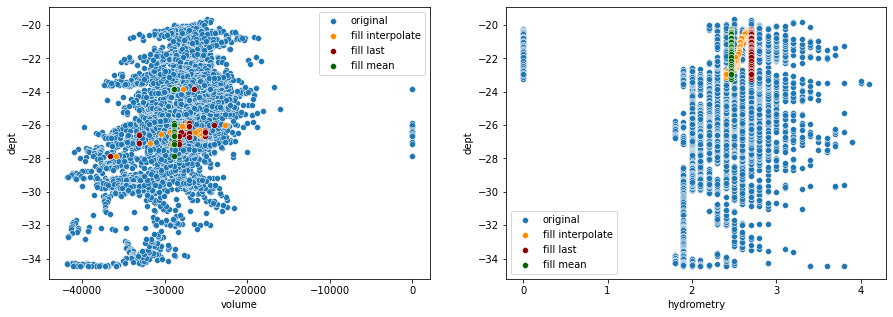

In [ ]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

volume = df.volume.replace(0, np.nan)
index = volume.isnull()
sns.scatterplot(df.volume, df.dept, ax = axs[0], label='original')
sns.scatterplot(volume.interpolate()[index], df.dept[index], color='darkorange', ax = axs[0], label='fill interpolate')
sns.scatterplot(volume.ffill()[index], df.dept[index], color='darkred', ax = axs[0], label='fill last')
sns.scatterplot(volume.fillna(volume.mean())[index], df.dept[index], color='darkgreen', ax = axs[0], label='fill mean')

hydrometry = df.hydrometry.replace(0, np.nan)
index = hydrometry.isnull()
sns.scatterplot(df.hydrometry, df.dept, ax = axs[1], label='original')
sns.scatterplot(hydrometry.interpolate()[index], df.dept[index], color='darkorange', ax = axs[1], label='fill interpolate')
sns.scatterplot(hydrometry.ffill()[index], df.dept[index], color='darkred', ax = axs[1], label='fill last')
sns.scatterplot(hydrometry.fillna(hydrometry.mean())[index], df.dept[index], color='darkgreen', ax = axs[1], label='fill mean')

plt.show()

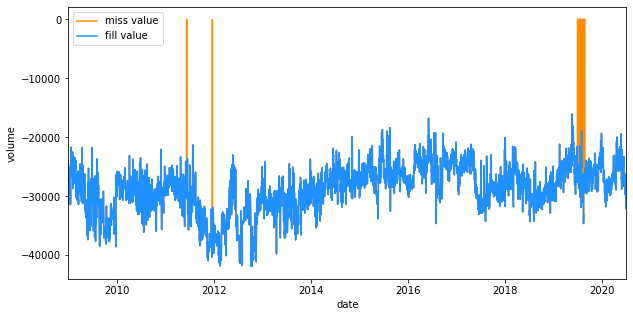

In [ ]:
df.volume.replace(0, np.nan, inplace=True)
plot_null_value(df, ['volume'], 'date')

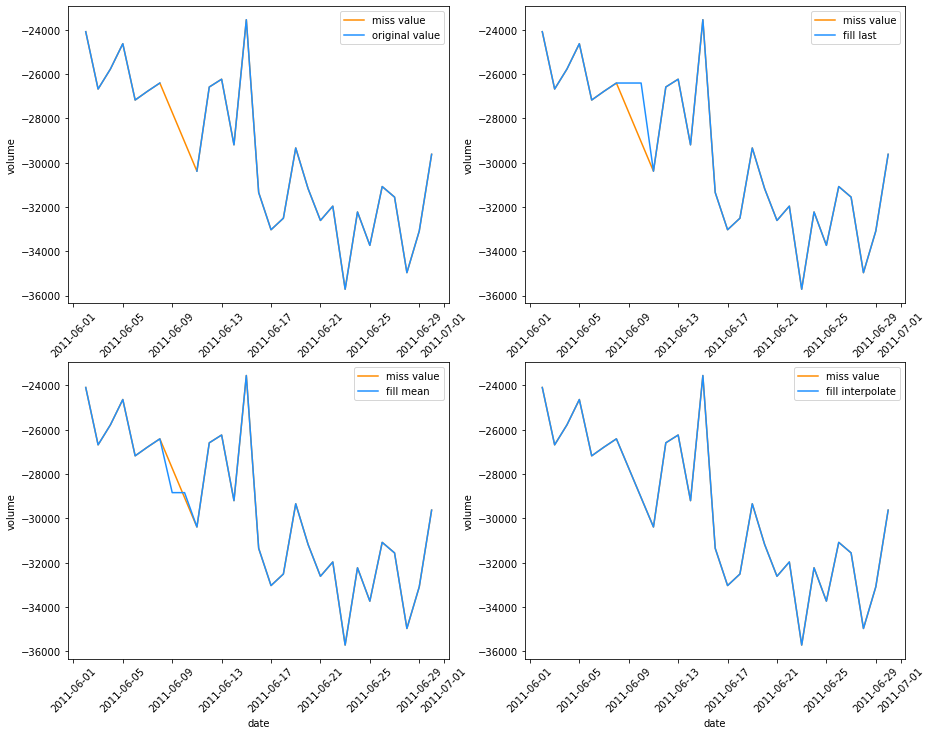

In [ ]:
index = (df.date > '06-2011') & (df.date < '07-2011')
fill_value_visual(df.date[index], df.volume)

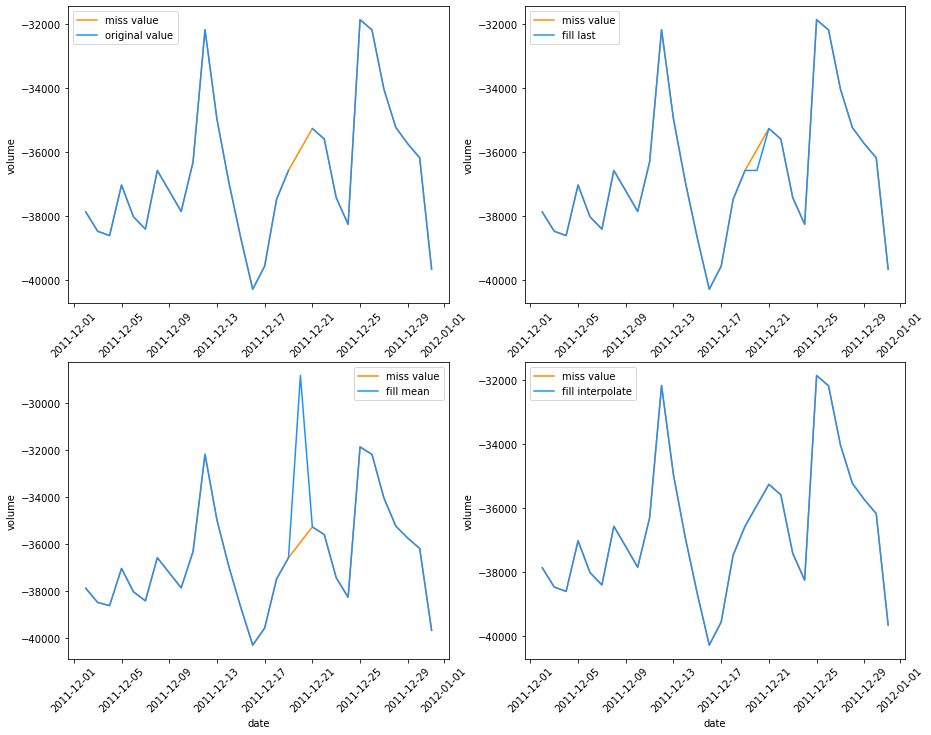

In [ ]:
index = (df.date > '12-2011') & (df.date < '01-2012')
fill_value_visual(df.date[index], df.volume)

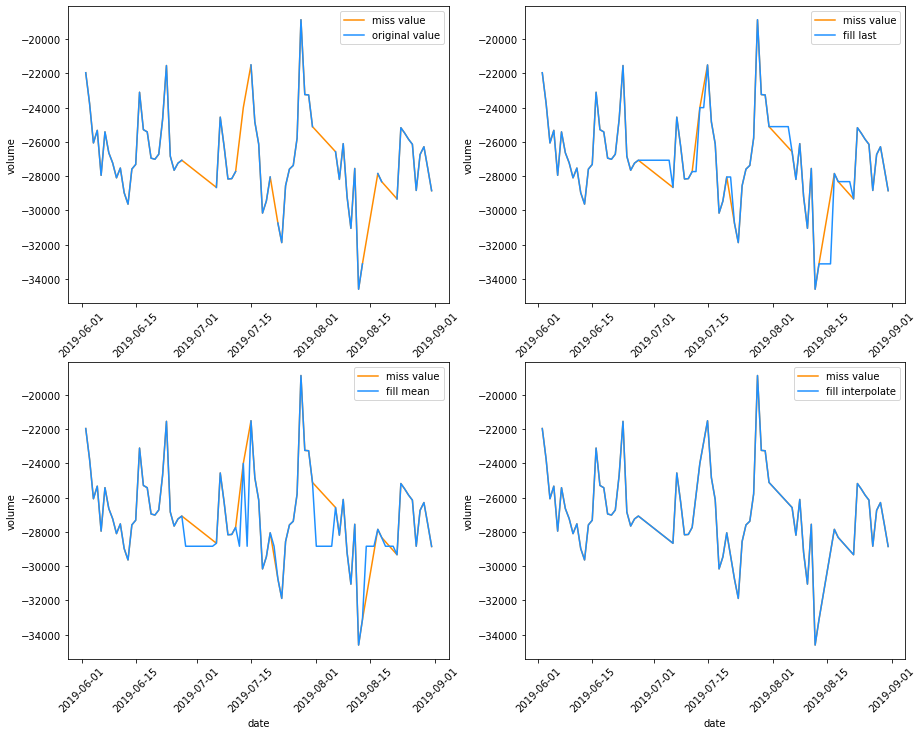

In [ ]:
index = (df.date > '06-2019') & (df.date < '09-2019')
fill_value_visual(df.date[index], df.volume)

In [ ]:
index = (df.date > '2014') & (df.date < '2016')
last_err, mean_err, inter_err = fill_score(df.volume[index], 0.2)
print("Last value filling: ", last_err)
print("Mean value filling: ", mean_err)
print("Interpolate value filling: ", inter_err)


Last value filling:  277.96232967032967
Mean value filling:  374.1159086758009
Interpolate value filling:  221.62106373626375


In [ ]:
df.volume.interpolate(inplace=True)

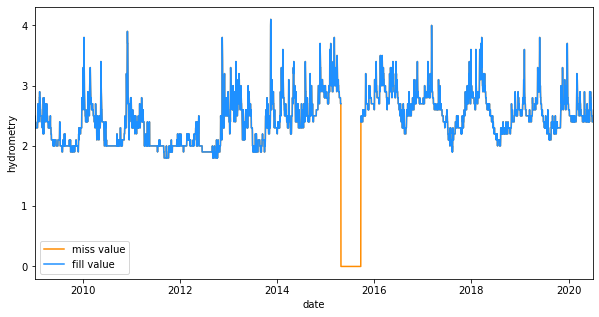

In [ ]:
df.hydrometry.replace(0, np.nan, inplace=True)
plot_null_value(df, ['hydrometry'], 'date')

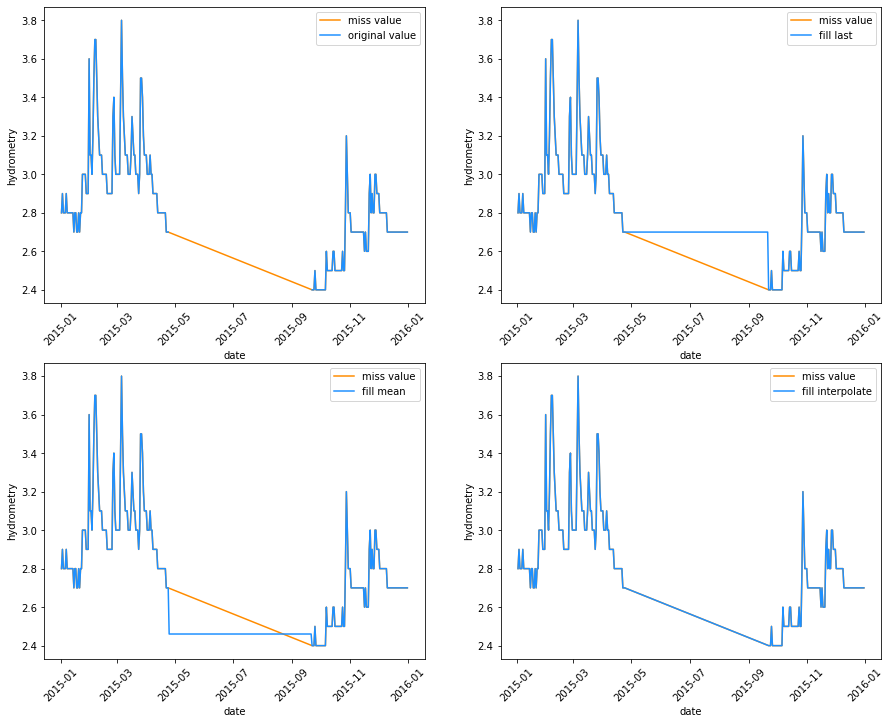

In [ ]:
index = (df.date > '2015') & (df.date < '2016')
fill_value_visual(df.date[index], df.hydrometry)

In [ ]:
index = (df.date > '2010') & (df.date < '2014')
last_err, mean_err, inter_err = fill_score(df.hydrometry[index], 0.2)
print("Last value filling: ", last_err)
print("Mean value filling: ", mean_err)
print("Interpolate value filling: ", inter_err)


Last value filling:  0.012534246575342462
Mean value filling:  0.05587774441733928
Interpolate value filling:  0.009668949771689502


In [ ]:
df.hydrometry.interpolate(inplace=True)

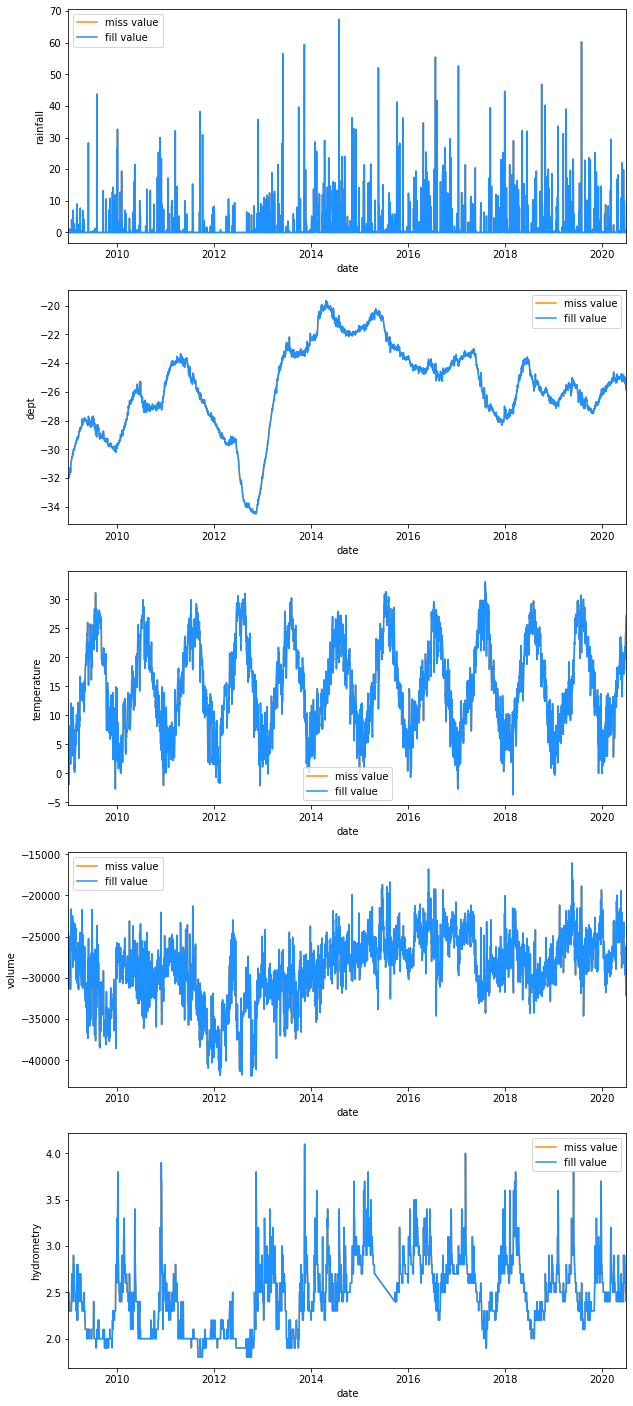

In [ ]:
plot_null_value(df, df.columns[1:], 'date')

In [5]:
df.to_csv('./checkpoint/clean_data.csv', index=False)

NameError: ignored

# Preprocessing

In [47]:
df = pd.read_csv('./checkpoint/clean_data.csv')
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

In [48]:
test_size = 0.2
break_point = int(len(df) * (1 - test_size))
train_df, test_df = df[:break_point], df[break_point:]

len(train_df), len(test_df)

(3359, 840)

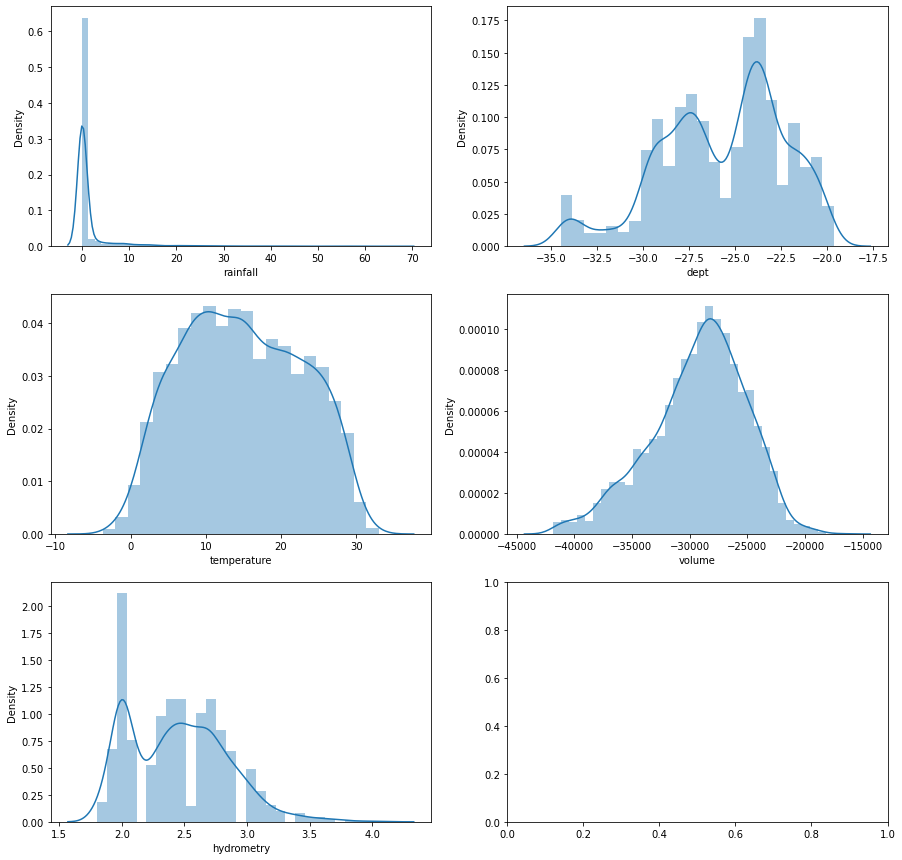

In [ ]:
_, axs = plt.subplots(nrows = 3, ncols=2, figsize =(15, 15))
flat_axs = axs.flatten()
for fax, col in zip(flat_axs, train_df.columns[1:]):
    sns.distplot(train_df[col], kde=True, ax=fax)

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [9]:
train_des = train_df.describe()
train_des

,rainfall,dept,temperature,volume,hydrometry
count,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000
mean,1.460405,-25.701811,14.836678,-29247.983571,2.448586
std,5.106874,3.363060,7.867655,4142.178809,0.391537
min,0.000000,-34.470000,-3.700000,-41890.176000,1.800000
25%,0.000000,-28.020000,8.500000,-31699.728000,2.100000
50%,0.000000,-24.990000,14.500000,-28759.104000,2.400000
75%,0.000000,-23.320000,21.300000,-26354.160000,2.700000
max,67.300000,-19.660000,33.000000,-16790.112000,4.100000


In [10]:
# train_des.loc[['max']].to_csv('./checkpoint/max_value.csv')

mimx_scaler = MinMaxScaler()
mimx_scaler.fit(train_df[['rainfall', 'dept', 'temperature', 'hydrometry']])

vol_scaler = StandardScaler()
vol_scaler.fit(train_df[['volume']])

StandardScaler()

In [12]:
train_df[['rainfall', 'dept', 'temperature', 'hydrometry']] = mimx_scaler.transform(train_df[['rainfall', 'dept', 'temperature', 'hydrometry']])
train_df[['volume']] = vol_scaler.transform(train_df[['volume']])
train_df.describe()

,rainfall,dept,temperature,volume,hydrometry
count,3359.000000,3359.000000,3359.000000,3.359000e+03,3359.000000
mean,0.021700,0.592045,0.505087,-5.338920e-16,0.281994
std,0.075882,0.227080,0.214378,1.000149e+00,0.170234
min,0.000000,0.000000,0.000000,-3.052518e+00,0.000000
25%,0.000000,0.435517,0.332425,-5.919854e-01,0.130435
50%,0.000000,0.640108,0.495913,1.180423e-01,0.260870
75%,0.000000,0.752870,0.681199,6.987275e-01,0.391304
max,1.000000,1.000000,1.000000,3.008013e+00,1.000000


In [13]:
import pickle

pickle.dump(mimx_scaler, open('./checkpoint/mimx_scaler.pkl', 'wb'))
pickle.dump(vol_scaler, open('./checkpoint/vol_scaler.pkl', 'wb'))

In [74]:
def get_scale_converter():
    mimx_scaler = pickle.load(open('./checkpoint/mimx_scaler.pkl', 'rb'))
    vol_scaler = pickle.load(open('./checkpoint/vol_scaler.pkl', 'rb'))
    def convert(df):
        df = df.copy()
        df[['rainfall', 'dept', 'temperature', 'hydrometry']] = mimx_scaler.inverse_transform(df[['rainfall', 'dept', 'temperature', 'hydrometry']])
        df[['volume']] = vol_scaler.inverse_transform(df[['volume']])
        return df

    return convert


# Training LSTM model

## Prepare data for training

In [11]:
train_df.describe()

,rainfall,dept,temperature,volume,hydrometry
count,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000
mean,1.460405,-25.701811,14.836678,-29247.983571,2.448586
std,5.106874,3.363060,7.867655,4142.178809,0.391537
min,0.000000,-34.470000,-3.700000,-41890.176000,1.800000
25%,0.000000,-28.020000,8.500000,-31699.728000,2.100000
50%,0.000000,-24.990000,14.500000,-28759.104000,2.400000
75%,0.000000,-23.320000,21.300000,-26354.160000,2.700000
max,67.300000,-19.660000,33.000000,-16790.112000,4.100000


In [49]:
feature_col = ['rainfall', 'temperature', 'volume', 'hydrometry']
target_col = ['dept']

scaler_X = MinMaxScaler()
scaler_X.fit(train_df[feature_col])
scaler_Y = MinMaxScaler()
scaler_Y.fit(train_df[target_col])
import pickle

pickle.dump(scaler_X, open('./checkpoint/feature_scaler.pkl', 'wb'))
pickle.dump(scaler_Y, open('./checkpoint/target_scaler.pkl', 'wb'))

def preprocessing_pipeline(df):
    X = scaler_X.transform(df[feature_col])
    Y = scaler_Y.transform(df[target_col])
    return X, Y

In [50]:
train_df.describe()

,rainfall,dept,temperature,volume,hydrometry
count,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000
mean,1.460405,-25.701811,14.836678,-29247.983571,2.448586
std,5.106874,3.363060,7.867655,4142.178809,0.391537
min,0.000000,-34.470000,-3.700000,-41890.176000,1.800000
25%,0.000000,-28.020000,8.500000,-31699.728000,2.100000
50%,0.000000,-24.990000,14.500000,-28759.104000,2.400000
75%,0.000000,-23.320000,21.300000,-26354.160000,2.700000
max,67.300000,-19.660000,33.000000,-16790.112000,4.100000


In [14]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [15]:
train_df.columns

Index(['date', 'rainfall', 'dept', 'temperature', 'volume', 'hydrometry'], dtype='object')

In [30]:
def make_time_series_data(X, Y, duration):
    X_new, Y_new = [], []
    for i in range(len(Y)):
        break_point = i + duration
        if break_point < len(Y):
            x, y = X[i:break_point], Y[break_point]
            X_new.append(x)
            Y_new.append(y)
        else:
            break
    return np.stack(X_new, axis = 0), np.stack(Y_new, axis = 0)

In [56]:
duration = 7
train_X, train_Y = preprocessing_pipeline(train_df)
shift_X, shift_Y = make_time_series_data(train_X, train_Y, duration)
shift_X.shape, shift_Y.shape

((3352, 7, 4), (3352, 1))

In [ ]:
model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(duration, len(feature_col))))
model.add(LSTM(64, activation='relu', return_sequences=False))
# model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
# fit model
model.fit(shift_X, shift_Y, epochs=100, batch_size=16)

Epoch 1/100
210/210 [==============================] - 14s 56ms/step - loss: 0.0493
Epoch 2/100
210/210 [==============================] - 12s 57ms/step - loss: 0.0323
Epoch 3/100
210/210 [==============================] - 12s 55ms/step - loss: 0.0323
Epoch 4/100
210/210 [==============================] - 13s 60ms/step - loss: 0.0315
Epoch 5/100
210/210 [==============================] - 12s 55ms/step - loss: 0.0317
Epoch 6/100
210/210 [==============================] - 12s 55ms/step - loss: 0.0314
Epoch 7/100
210/210 [==============================] - 12s 55ms/step - loss: 0.0309
Epoch 8/100
210/210 [==============================] - 12s 56ms/step - loss: 0.0308
Epoch 9/100
210/210 [==============================] - 12s 56ms/step - loss: 0.0301
Epoch 10/100
210/210 [==============================] - 12s 55ms/step - loss: 0.0298
Epoch 11/100
210/210 [==============================] - 16s 76ms/step - loss: 0.0292
Epoch 12/100
210/210 [==============================] - 21s 99ms/step - lo

In [ ]:
X_test, Y_test = preprocessing_pipeline(test_df)
shift_X, shift_Y = make_time_series_data(X_test, Y_test, duration)
y_hat = model.predict(shift_X)

In [ ]:
def plot_prediction(y, y_hat):
    _, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.lineplot(np.arange(len(y)), y.flatten(), ax=ax, label='original')
    sns.lineplot(np.arange(len(y)), y_hat.flatten(), ax=ax, label='prediction', color='orange')

plot_prediction(scaler_Y.inverse_transform(shift_Y), scaler_Y.inverse_transform(y_hat))

In [ ]:

# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
model.save("./checkpoint/model.h5")

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("./checkpoint/model.h5")

In [ ]:
test_X, test_Y = preprocessing_pipeline(test_df)
Y_predict = model.predict(test_X)

In [ ]:
sns.lineplot(np.arange(len(shift_Y)), shift_Y.flatten())
sns.lineplot(np.arange(len(shift_Y)), y_hat.flatten())

https://www.kaggle.com/nandha13/time-series-preprocess-feature-engineering-eda